 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Survival-on-the-Titanic" data-toc-modified-id="Survival-on-the-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Survival on the Titanic</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Data-Acquistion-and-Interpretation" data-toc-modified-id="Data-Acquistion-and-Interpretation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Acquistion and Interpretation</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Preliminary-Analysis-and-Data-Characterization" data-toc-modified-id="Preliminary-Analysis-and-Data-Characterization-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Preliminary Analysis and Data Characterization</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dataset-Int/Float-Distribution" data-toc-modified-id="Dataset-Int/Float-Distribution-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Dataset Int/Float Distribution</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dataset-Object-Distribution" data-toc-modified-id="Dataset-Object-Distribution-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Dataset Object Distribution</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Analysis:-Quick-Correlations" data-toc-modified-id="Analysis:-Quick-Correlations-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Analysis: Quick Correlations</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Appendix" data-toc-modified-id="Appendix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Types-of-Variables" data-toc-modified-id="Types-of-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Types of Variables</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Categorical-Variables" data-toc-modified-id="Categorical-Variables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Numerical-Variables" data-toc-modified-id="Numerical-Variables-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Numerical Variables</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Resources" data-toc-modified-id="Resources-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Resources</a></span></li></ul></li></ul></div>

# Survival on the Titanic
<a id="top"></a>

This is a notebook to analyze and predict survival rates for passengers on board the Titanic. As stated on [kaggle.com](https://www.kaggle.com/c/titanic):

>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502** out of **2224** (**$\sim$ 68%**) passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each `PassengerId` in the test set, you must predict a **0** or **1** value for the `Survived` variable.

>Your score is the percentage of passengers you correctly predict.

Both a training dataset (used to train the machine learning algorithim) and a test dataset (used to test the algorithm) have been [provided](https://www.kaggle.com/c/titanic/data). This notebook has borrowed heavily in content and analysis from the following resources:

* [Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Omar El Gabry](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)
* [Arthur Tok](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

**Last edited**: 2017-09-29 17:56:57 

## Executive Summary

Stuff goes here once I'm finished.

## Data Acquistion and Interpretation

In [1]:
# first import relevant libraries

# data management and mathematical functions
import pandas as pd
import numpy as np
import random as rnd

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

Now import the data for our problem and look at the first few entries for the training data. The training data is used to train our model which is then applied to the test data (and whereby success is gauged).

In [2]:
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")

### Preliminary Analysis and Data Characterization
<a id="Intro"></a>

Now let's take a quick detour and explore different ways to get information from our dataset. This section can be collapsed or [skipped](#analysis_qc) for more knowledgeable readers.

The first thing we need to do is analyze this dataset and see what it contains. To see the columns in our dataframe, we use the `columns.values` command:

In [3]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

We can also extract the number of rows and columns of the data frame.

In [4]:
train.shape 

(891, 12)

We can print out the first three entries of our dataset using the `.head()` option,

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


or print out the last three entries with `.tail()`. Note that both of these commands defaults to 5 with no numerical entry.

In [6]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


To get the actual structure, we use the `.info()` command:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So we see that our training set has **891** different entires equivalent to **$\sim$40%** of all passengers on board.
Each entry has **12** different variables: 

* 2 float types
* 5 int types
* 5 string types (objects)

Note also that we have some missing data, e.g., only 714 age entries for 891 people. What do these different variables mean? Let's break it down:

Variable Name  | Meaning
-------------- | -------------
PassengerId    | unique numeric identifier
Survived       | whether the passenger survived or not
Pclass         | ticket class
Name           | passenger name
Sex            | passenger sex
Age            | passenger age
SibSp          | number of siblings/spouses aboard the ship
Parch          | number of parents/children aboard the ship
Ticket         | ticket number
Fare           | passenger fare in USD
Cabin          | cabin number
Embarked       | port of embarkation

For a review of categorical and numerical variables, see [Appendix 2.1](#app_vartypes).

**Categorical Variables**

* **Nominal**: Survived, Sex, and Embarked
* **Ordinal**: Pclass

    * Survived is 0 for No and 1 for Yes
    * Sex is male or female
    * Embarked is the port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
    * pclass takes the values 1 = 1st class, 2 = 2nd class, 3 = 3rd class

**Numerical Variables**

* **Continous**: Age, Fare. 
* **Discrete**: SibSp, Parch.


### Dataset Int/Float Distribution

We can use the `.describe()` command to get a quick analysis of the int/float variables in our dataset. By default this command only includes variables described by a number (*note that this also includes categorical variables!*). We make this default explicit with the option `include = [np.number]`. If we wanted to include everything at once, we would use `include = 'all'`.

In [8]:
train.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


There are several salient points to note from the data in the training set:

* *Representative surival rate*: The survival rate is **38%** (c.f. total survival rate of **32%**)
<br><br>
* *Most fly coach*: About **20%** of passengers were in 1st class with **50%** of people in 3rd class
<br><br>
* *Mostly young*: Around **20%** of passengers were **19** or younger with **90%** being younger than **50**
<br><br>
* *Some family ties*: Around **30%** of passengers had a sibling or spouse on board
<br><br>
* *Few dependents*: More than **70%** of passengers had no parents or children aboard 
<br><br>
* *Low fares*: The average fare was **\$32** and **90%** of all fares were under **\$78**

We can reinforce some of these points graphically (because pictures are better than words).

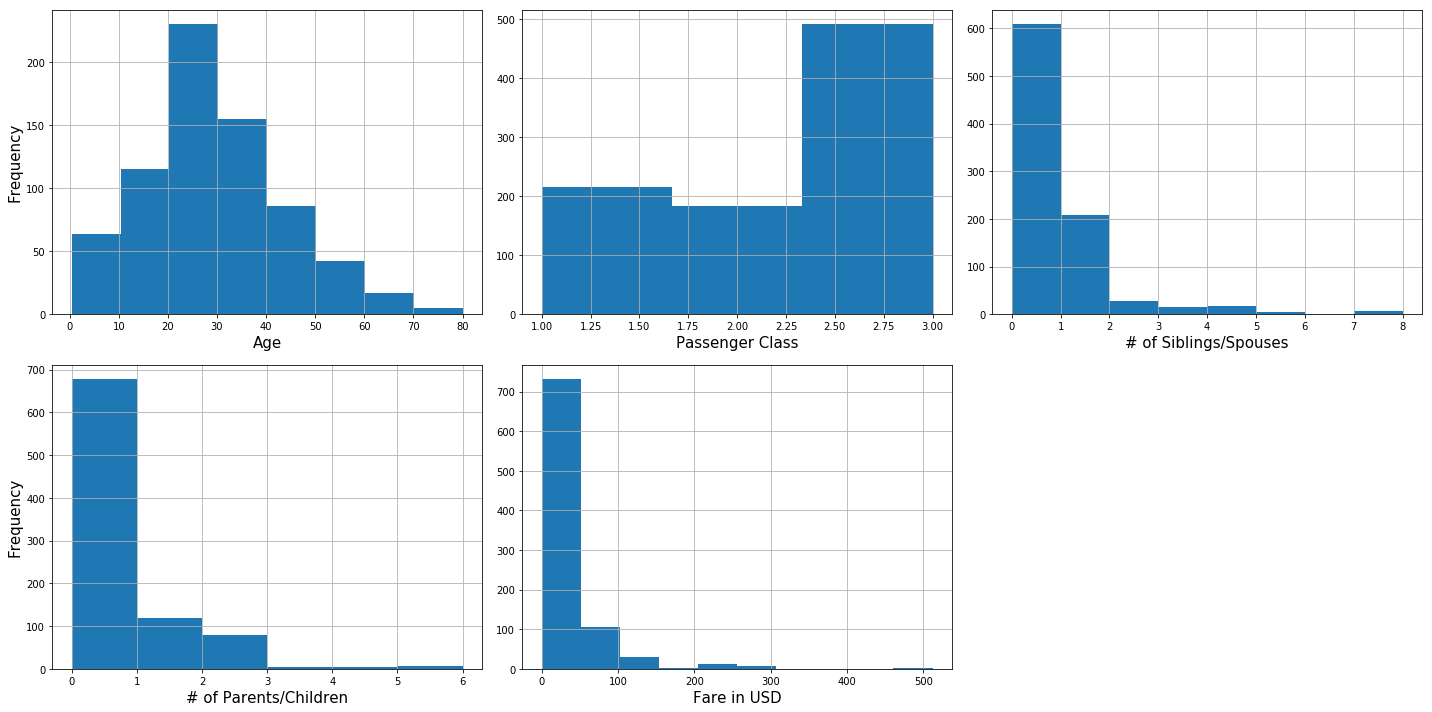

In [9]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(231)
train.hist(column='Age', bins=8, ax=ax)
plt.title('')
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

bx = fig.add_subplot(232)
train.hist(column='Pclass', bins=3, ax=bx)
plt.title('')
plt.xlabel("Passenger Class", fontsize=15)
#plt.subplot(111).set_xticklabels('')
#plt.subplot(111).set_xticks([0.5,1.5,2.5,3.5], minor=True)

cx = fig.add_subplot(233)
train.hist(column='SibSp', bins=8, ax=cx)
plt.title('')
plt.xlabel("# of Siblings/Spouses", fontsize=15)

dx = fig.add_subplot(234)
train.hist(column='Parch', bins=6, ax=dx)
plt.title('')
plt.xlabel("# of Parents/Children", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

ex = fig.add_subplot(235)
train.hist(column='Fare', ax=ex)
plt.title('')
plt.xlabel("Fare in USD", fontsize=15)

fig.tight_layout()

plt.show()

### Dataset Object Distribution

To include the rest of the variables (the objects), we modify our `.describe()` command to include all the objects, i.e., `np.object`. We could also have used `include = ['O']`.

In [10]:
train.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brocklebank, Mr. William Alfred",male,347082,B96 B98,S
freq,1,577,7,4,644


Here we see that in the training set:

* Names are unique in the dataset
* Sex has 2 different variables with about **65%** of passengers being men
* Many of the issued tickets are duplicates with about **76%** unique
* Many of the cabins are booked more than once with **72%** of bookings being unique
* There were 3 ports embarkation with about **72%** of passengers coming from Southampton

### Analysis: Quick Correlations
<a id="analysis_qc"></a>

Now that we have understand what is in our dataset, we can look at a few quick correlations between different variables to see if we can spot any preliminary patterns. From the description given [above](#top) and the variables in our dataset, we expect to see correlations between `Survival` and `Sex`, `Age`, `Pclass`, and `Fare`.

In [11]:
train[['Sex', 'Survived']].groupby(by=['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[['Pclass', 'Survived']].groupby(by=['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


And this is exactly what we find. Survival with is associated with being female and being in the higher ship classes. Looking additionally at the Siblings/Spouses and Parents/Children variables, we observe:

In [13]:
train[['SibSp', 'Survived']].groupby(by=['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train[['Parch', 'Survived']].groupby(by=['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


There may be a slight positive correlation between `Survival` and `Parch` (for family sizes $<4$) but we have very little data for anything with `Parch >= 3`.

In [15]:
train[['Fare', 'Survived']].groupby(by=train['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
1,48.395408,1
0,22.117887,0


In [16]:
#colormap = plt.cm.viridis
#plt.figure(figsize=(12,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

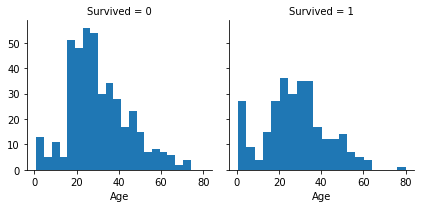

In [19]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

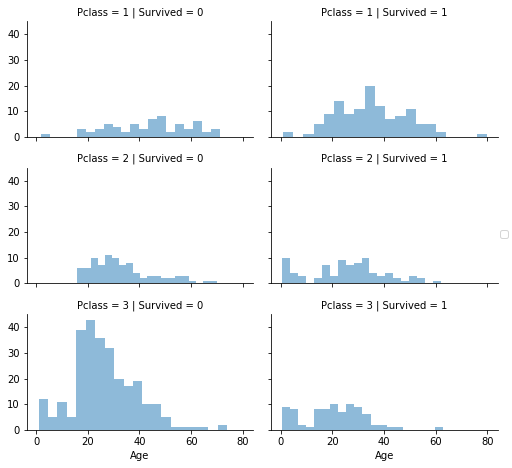

In [23]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

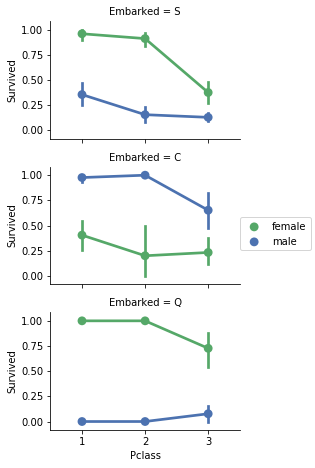

In [26]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

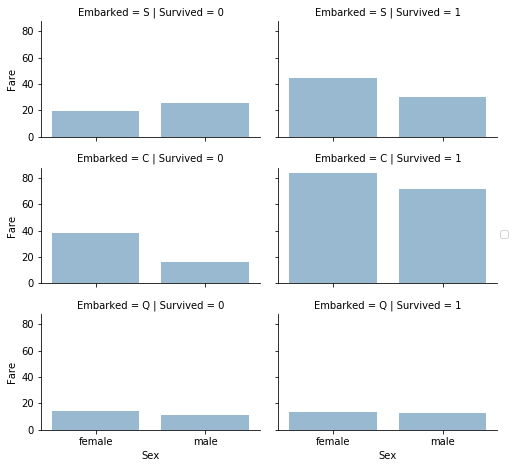

In [29]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

# Appendix
<a id="appendix"></a>

## Types of Variables
<a id="app_vartypes"></a>

### Categorical Variables
<a id="app_categorical"></a>

Categorical variables are *qualitative* and take on only a limited number of values. There are 3 types, nominal, ordinal, and interval:

* A **nominal variable** (sometimes called a **categorical variable**) is one that has two or more categories, but there is no intrinsic ordering to the categories, e.g., gender, hair color
<br><br>
* An **ordinal variable** is a type of categorical variable but one for which a clear ordering exists, e.g., education level (elementary, high school, college, graduate)
<br><br>
* An **interval variable** is similar to an ordinal variable but is defined on intervals that are equally spaced, e.g., whether someone is in the \$20,000-\$30,000, \$30,000-\$40,000, or \$40,000-\$50,000 income bracket

### Numerical Variables
<a id="app_numerical"></a>

Numerical variables are *quantitative* and have numbers as their values. There are 2 types, continuous and discrete:

* A **continuous variable** can take on any value in some range, e.g., the height of a person
<br><br>
* A **discrete variable** can only take on a specific number, e.g., how many siblings does a person have

## Resources
<a id='resources'></a>

[Manav Sehgal's Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[Omar El Gabry's Notebook](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)

[Arthur Tok's Notebook](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

[Sushant implementation](http://nbviewer.jupyter.org/github/sushant2811/KaggleTitanic/blob/master/KaggleTitanicSushant.ipynb)

[IBM Markdown Cheatsheet](http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/)

[Another Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

[Discussion on categorical variables](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)